In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import warnings
import time
import cv2
import copy
import keras 
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.datasets import fetch_olivetti_faces
from keras.models import Sequential
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
def load_dataset():
  dataset = fetch_olivetti_faces()
  X = dataset.images
  y = dataset.target
  m, n = X[0].shape
  X = X.reshape(X.shape[0], m, n, 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_dataset()

In [ ]:
def create_model():
  model = Sequential([
      layers.Conv2D(32, (3, 3), 1, padding="same", activation='relu', input_shape=(64, 64, 1)),
      layers.MaxPooling2D((2, 2), strides=1),
      layers.Conv2D(64, (3, 3), 1, padding="same", activation='relu'),
      layers.MaxPooling2D((2, 2), strides=2),
      layers.Conv2D(64, (3, 3), 1, padding="same", activation='relu'),
      layers.MaxPooling2D((2, 2), strides=1),
      layers.Flatten(),
      layers.Dense(40, activation = 'softmax')
  ])
  opt = optimizers.SGD(lr=0.001, momentum=0.9) # "adam"
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model  

model = create_model()
model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=0)
model.evaluate(X_test,(y_test), verbose=0)

[0.2474866658449173, 0.9399999976158142]

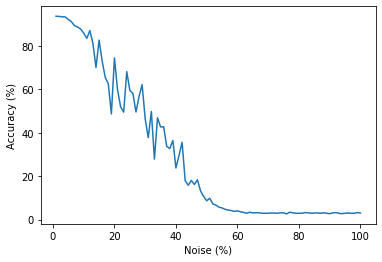

In [ ]:
accuracy_noise1 = []
for i in np.arange(1, 100+1):
  iaccuracy = []
  prob = i / 100
  for j in range(10):
    x_test = copy.copy(X_test)
    mask = np.random.uniform(size=X_test.shape)
    x_test[mask <= prob] = np.random.choice([0,1])
    results = model.evaluate(x_test,(y_test), verbose=0)
    iaccuracy.append(results[1])
  accuracy_noise1.append(np.mean(iaccuracy))
plt.plot(np.arange(1, 100+1), np.array(accuracy_noise1)*100)
plt.xlabel("Noise (%)")
plt.ylabel("Accuracy (%)")
plt.show()

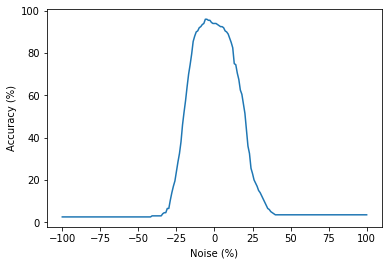

In [ ]:
accuracy_noise2 = []
for i in np.arange(-100, 100+1):
  x_test = X_test + i / 100
  x_test[x_test > 1] = 1
  x_test[x_test < 0] = 0
  results = model.evaluate(x_test,(y_test), verbose=0)
  accuracy_noise2.append(results[1])
plt.plot(np.arange(-100, 100+1), np.array(accuracy_noise2)*100)
plt.xlabel("Noise (%)")
plt.ylabel("Accuracy (%)")
plt.show()